# [추천 시스템 입문편] 나와 친구를 위한 영화 추천

## 나의 데이터 EDA

In [1]:
# 필요한 패키지 설치
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 읽어오기
my_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/추천 시스템 입문편/data/ml-latest-small/my-ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/추천 시스템 입문편/data/ml-latest-small/movies.csv')
genres = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/추천 시스템 입문편/data/ml-latest-small/genres.p')

In [3]:
my_ratings.shape

(112, 4)

In [4]:
my_ratings['userId'].value_counts()

1001    92
1002    15
1000     5
Name: userId, dtype: int64

In [5]:
# 유저 별점 테이블에 영화 정보와 장르 정보를 이너 조인으로 붙이기
# 유저 별점 테이블의의 movieId와 movies의 movieId, genres의 index(movieId)를 기준으로 조인
my_ratings = my_ratings.merge(movies, on='movieId').merge(genres, left_on='movieId', right_index=True)

In [6]:
my_ratings.sample()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
61,1001,174055,3,2020. 2. 21 오후 2:34:00,Dunkirk (2017),Action|Drama|Thriller|War,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
# 유저 1001번의 별점 정보 살펴보기
user1001 = my_ratings[my_ratings['userId'] == 1001 ]
user1001

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1001,96079,3,2020. 2. 21 오후 2:34:00,Skyfall (2012),Action|Adventure|Thriller|IMAX,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1001,81562,4,2020. 2. 21 오후 2:34:00,127 Hours (2010),Adventure|Drama|Thriller,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,1001,95441,2,2020. 2. 21 오후 2:34:00,Ted (2012),Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1001,135861,2,2020. 2. 21 오후 2:34:00,Ted 2 (2015),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1001,112138,3,2020. 2. 21 오후 2:34:00,22 Jump Street (2014),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1001,162414,5,2020. 2. 21 오후 2:34:00,Moonlight,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,1001,150604,5,2020. 2. 21 오후 2:34:00,Moonwalkers (2015),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1001,168366,5,2020. 2. 21 오후 2:34:00,Beauty and the Beast (2017),Fantasy|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
110,1001,135887,5,2020. 2. 21 오후 2:34:00,Minions (2015),Adventure|Animation|Children|Comedy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
user1001.shape

(92, 26)

<Axes: >

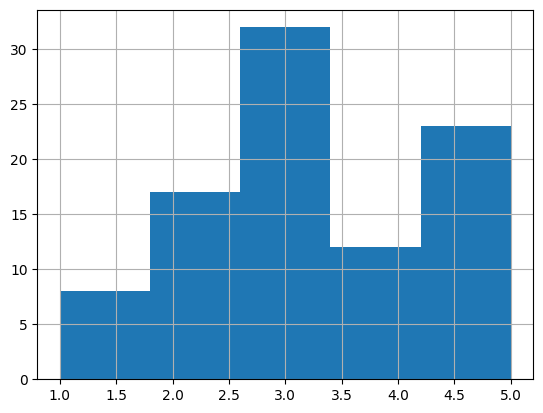

In [9]:
# 유저 1001번의 영화 평점 히스토그램
user1001['rating'].hist(bins=5) # 5개로만 점수를 줬으므로 보기 좋도록 정리

In [10]:
# 유저 10001번의 별점
user1001['rating'].value_counts()

3    32
5    23
2    17
4    12
1     8
Name: rating, dtype: int64

In [11]:
# 유저 10001번의 별점
user1001['rating'].describe()

count    92.000000
mean      3.271739
std       1.267543
min       1.000000
25%       2.000000
50%       3.000000
75%       4.250000
max       5.000000
Name: rating, dtype: float64

In [12]:
# 유저 10001번이 최고점을 준 영화
user1001[user1001['rating'] == 5.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
17,1001,168712,5,2020. 2. 21 오후 2:34:00,Fifty Shades Darker (2017),Drama|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29,1001,183897,5,2020. 2. 21 오후 2:34:00,Isle of Dogs (2018),Animation|Comedy,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,1001,88129,5,2020. 2. 21 오후 2:34:00,Drive (2011),Crime|Drama|Film-Noir|Thriller,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
71,1001,97938,5,2020. 2. 21 오후 2:34:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
72,1001,140162,5,2020. 2. 21 오후 2:34:00,Love (2015),Drama|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,1001,179133,5,2020. 2. 21 오후 2:34:00,Loving Vincent (2017),Animation|Crime|Drama,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1001,152079,5,2020. 2. 21 오후 2:34:00,London Has Fallen (2016),Action|Crime|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
75,1001,167746,5,2020. 2. 21 오후 2:34:00,The Lego Batman Movie (2017),Action|Animation|Comedy,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
76,1001,140956,5,2020. 2. 21 오후 2:34:00,Ready Player One,Action|Sci-Fi|Thriller,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
91,1001,151317,5,2020. 2. 21 오후 2:34:00,Maggie's Plan (2015),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 장르 컬럼 저장
genre_cols = genres.columns

In [14]:
# 유저 1001번이 본 영화의 장르
user1001[genre_cols].sum().sort_values(ascending=False)

Drama                 40
Comedy                32
Adventure             26
Action                25
Thriller              20
Sci-Fi                18
Romance               15
Fantasy               11
Animation              9
Crime                  8
Horror                 7
IMAX                   7
Mystery                5
Children               4
War                    3
(no genres listed)     1
Film-Noir              1
Musical                1
Documentary            1
Western                0
dtype: int64

## 나와 친구들의 데이터 EDA

In [15]:
# 나와 친구의 같은 취향 살펴보기
# 3명의 데이터가 있으므로 movieId가 같은 것이 3개가 있다면 모두 같은 영화를 본 것
my_ratings['movieId'].value_counts().sort_values(ascending=False)

96079     3
135861    3
112138    3
81562     3
95441     3
         ..
150604    1
168366    1
135887    1
103141    1
86882     1
Name: movieId, Length: 92, dtype: int64

In [16]:
my_ratings[my_ratings['movieId'] == 96079]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1000,96079,2,2020-02-21 14:34:20,Skyfall (2012),Action|Adventure|Thriller|IMAX,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1001,96079,3,2020. 2. 21 오후 2:34:00,Skyfall (2012),Action|Adventure|Thriller|IMAX,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1002,96079,5,2020. 2. 21 오후 2:34:00,Skyfall (2012),Action|Adventure|Thriller|IMAX,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [17]:
# 원본 데이터 복사
my_ratings_v1 = my_ratings.copy()

In [18]:
# 나와 친구의 다른 취향 살펴보기
# 같이 영화를 보려면 이 장르는 반드시 피해야 함
my_ratings_v1 = my_ratings_v1.replace(0, np.nan)

In [19]:
# 유저 프로필 생성
for col in genre_cols:
    my_ratings_v1[col] = my_ratings_v1[col] * my_ratings_v1['rating']

In [20]:
# 각 유저 별 특정 장르의 평균 점수
user_profile_v1 = my_ratings_v1.groupby(['userId'])[genre_cols].mean()
user_profile_v1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1000,NaN,2.00,2.500000,NaN,NaN,3.666667,2.000,NaN,3.000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.50,NaN,NaN
1001,2.0,3.32,3.230769,3.666667,3.0,3.593750,3.875,3.0,3.275,3.363636,5.0,2.714286,3.285714,3.0,2.4,3.733333,3.111111,3.05,3.333333,NaN
1002,5.0,3.20,4.000000,5.000000,NaN,3.500000,2.000,NaN,2.750,4.000000,NaN,3.000000,3.000000,NaN,NaN,5.000000,4.000000,3.75,1.000000,NaN


In [21]:
# 호불호가 심한 장르
user_profile_describe = user_profile_v1.describe()
user_profile_describe

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,2.00000,3.000000,3.000000,2.000000,1.0,3.000000,3.000000,1.0,3.000000,3.000000,1.0,2.000000,3.000000,1.0,1.0,2.000000,2.000000,3.000000,2.000000,0.0
mean,3.50000,2.840000,3.243590,4.333333,3.0,3.586806,2.625000,3.0,3.008333,3.787879,5.0,2.857143,2.761905,3.0,2.4,4.366667,3.555556,3.100000,2.166667,NaN
std,2.12132,0.729932,0.750082,0.942809,NaN,0.083550,1.082532,NaN,0.262599,0.367405,NaN,0.202031,0.675117,NaN,NaN,0.895669,0.628539,0.626498,1.649916,NaN
min,2.00000,2.000000,2.500000,3.666667,3.0,3.500000,2.000000,3.0,2.750000,3.363636,5.0,2.714286,2.000000,3.0,2.4,3.733333,3.111111,2.500000,1.000000,NaN
25%,2.75000,2.600000,2.865385,4.000000,3.0,3.546875,2.000000,3.0,2.875000,3.681818,5.0,2.785714,2.500000,3.0,2.4,4.050000,3.333333,2.775000,1.583333,NaN
50%,3.50000,3.200000,3.230769,4.333333,3.0,3.593750,2.000000,3.0,3.000000,4.000000,5.0,2.857143,3.000000,3.0,2.4,4.366667,3.555556,3.050000,2.166667,NaN
75%,4.25000,3.260000,3.615385,4.666667,3.0,3.630208,2.937500,3.0,3.137500,4.000000,5.0,2.928571,3.142857,3.0,2.4,4.683333,3.777778,3.400000,2.750000,NaN
max,5.00000,3.320000,4.000000,5.000000,3.0,3.666667,3.875000,3.0,3.275000,4.000000,5.0,3.000000,3.285714,3.0,2.4,5.000000,4.000000,3.750000,3.333333,NaN


In [22]:
# 모두가 다 본 장르
# 표준편차가 제일 큰 장르는 호불호가 가장 강함
user_profile_describe.loc[:, user_profile_describe.loc['count'] == 3]

,Action,Adventure,Comedy,Crime,Drama,Fantasy,IMAX,Thriller
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.840000,3.243590,3.586806,2.625000,3.008333,3.787879,2.761905,3.100000
std,0.729932,0.750082,0.083550,1.082532,0.262599,0.367405,0.675117,0.626498
min,2.000000,2.500000,3.500000,2.000000,2.750000,3.363636,2.000000,2.500000
25%,2.600000,2.865385,3.546875,2.000000,2.875000,3.681818,2.500000,2.775000
50%,3.200000,3.230769,3.593750,2.000000,3.000000,4.000000,3.000000,3.050000
75%,3.260000,3.615385,3.630208,2.937500,3.137500,4.000000,3.142857,3.400000
max,3.320000,4.000000,3.666667,3.875000,3.275000,4.000000,3.285714,3.750000


In [23]:
Crime = my_ratings[my_ratings['Crime'] == 1]
Crime

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
12,1000,112138,2,2020. 2. 21 오후 2:34:00,22 Jump Street (2014),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1001,112138,3,2020. 2. 21 오후 2:34:00,22 Jump Street (2014),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1002,112138,2,2020. 2. 21 오후 2:34:00,22 Jump Street (2014),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44,1001,102903,3,2020. 2. 21 오후 2:34:00,Now You See Me (2013),Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
46,1001,158238,3,2020. 2. 21 오후 2:34:00,The Nice Guys (2016),Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
50,1001,1249,2,2020. 2. 21 오후 2:34:00,"Femme Nikita, La (Nikita) (1990)",Action|Crime|Romance|Thriller,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
68,1001,88129,5,2020. 2. 21 오후 2:34:00,Drive (2011),Crime|Drama|Film-Noir|Thriller,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
73,1001,179133,5,2020. 2. 21 오후 2:34:00,Loving Vincent (2017),Animation|Crime|Drama,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1001,152079,5,2020. 2. 21 오후 2:34:00,London Has Fallen (2016),Action|Crime|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
99,1001,102194,5,2020. 2. 21 오후 2:34:00,Mud (2012),Adventure|Crime|Drama,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='userId', ylabel='rating'>

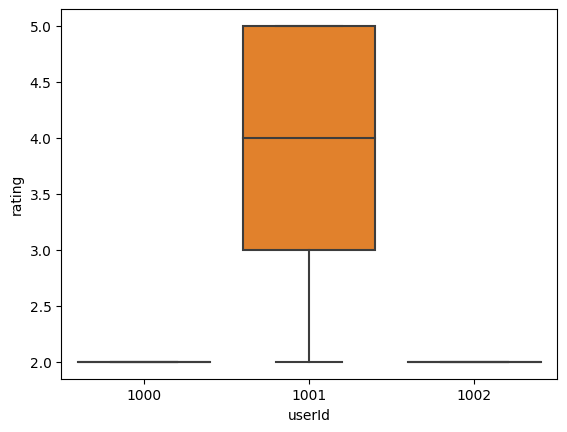

In [24]:
sns.boxplot(data=Crime, x='userId', y='rating')

## Lasso 하이퍼파라미터 튜닝

In [25]:
# 가장 대표적인 파라미터는 알파(α)
# 알파는 정규화 텀을 모델에 얼마나 반영할 것인지를 정하며, 커질수록 정규화 텀의 영향을 더 많이 받게 됨
model = Lasso()
model

Lasso()

In [26]:
# Random Search로 하이퍼파라미터 튜닝
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [27]:
# 0부터 1.0 까지 사이의 모든 숫자를 동일한 확률로 랜덤으로 뽑아줌 
# 강의와 비슷한 결과를 위해 0부터 0.01 까지의 숫자로 제한
param_grid = {'alpha' : sp_rand(0, 0.01)}

# 200번 시도
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=200, cv=20, random_state=42)

In [28]:
# Lasso로 유저 1001번의 유저 프로필 만들기
rsearch.fit(user1001[genre_cols], user1001['rating'])

RandomizedSearchCV(cv=20, estimator=Lasso(), n_iter=200,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7706674f70>},
                   random_state=42)

In [29]:
# 가장 좋은 모델
# 본래 0부터 1.0 까지로 랜덤을 할 경우 0.3745401188473625
rsearch.best_estimator_

Lasso(alpha=0.009868869366005173)

In [30]:
intercept = rsearch.best_estimator_.intercept_
coef = rsearch.best_estimator_.coef_

In [31]:
# # 표 형식으로 변환 
user1001_profile = pd.DataFrame([intercept, *coef], index=['intercept', *genre_cols], columns=['score'])
user1001_profile

,score
intercept,2.884478
(no genres listed),-0.000000
Action,0.147464
Adventure,-0.000000
Animation,0.128522
Children,-0.204296
Comedy,0.510458
Crime,0.765036
Documentary,0.000000
Drama,0.169361


<Axes: xlabel='index', ylabel='score'>

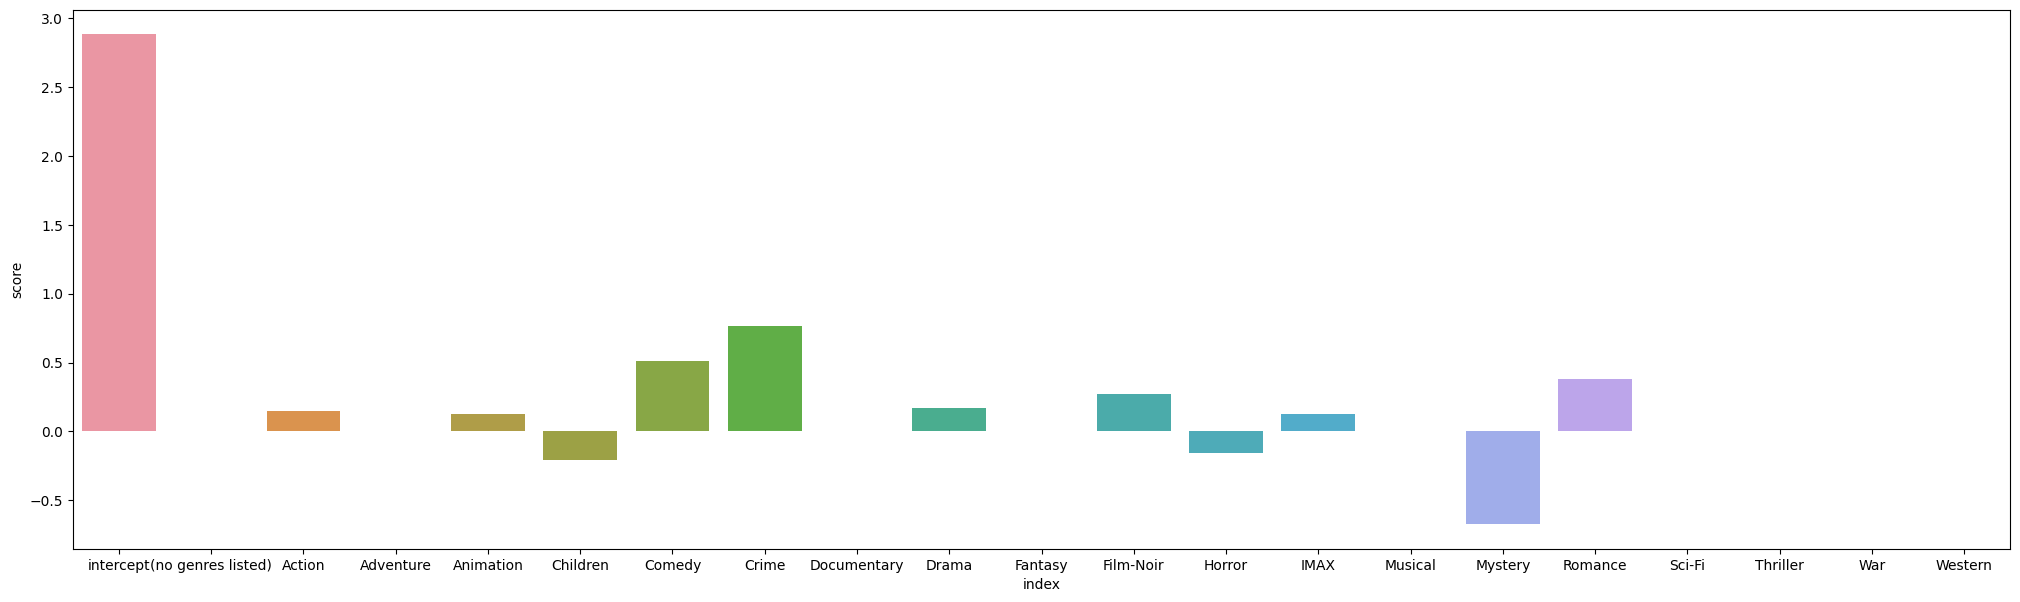

In [32]:
# 유저 1001번의 유저 프로필 시각화하기
# 쓸모 있는 계수(분명한 선호도의 장르 계수)만 남김
plt.figure(figsize=(25, 7))
sns.barplot(data=user1001_profile.reset_index(), x='index', y='score')

## 나에게 어떤 영화들이 추천되었을까?

In [33]:
# 모든 영화 장르에 대한 평점 예측해보기
predictions = rsearch.best_estimator_.predict(genres)
predictions

array([3.3191622 , 2.68018216, 3.77675326, ..., 3.05383844, 3.16046419,
       3.39493581])

In [34]:
genres['user1001'] = predictions

In [35]:
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.319162
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.680182
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.776753
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.946114
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.394936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.670922
193583,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.523458
193585,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.053838


In [36]:
# 유저 1001번이 보지 않은 영화의 평점 예측 추려보기
rating_predictions = genres[~genres.index.isin(user1001['movieId'])].sort_values('user1001', ascending=False)
rating_predictions

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001
movieId,,,,,,,,,,,,,,,,,,,,,
4719,0,1,0,1,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,4.987136
6023,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,4.711150
129354,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,4.711150
144606,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,4.711150
72919,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,4.711150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80846,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2.050763
89837,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2.050763
2454,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,2.050763


In [37]:
# 영화 정보 붙이기
ratings_predictions = rating_predictions.merge(movies[['movieId', 'title']], left_index=True, right_on='movieId')
ratings_predictions

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001,movieId,title
3460,0,1,0,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,4.987136,4719,Osmosis Jones (2001)
4180,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,6023,Band of Outsiders (Bande à part) (1964)
8785,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,129354,Focus (2015)
9106,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,4.711150,144606,Confessions of a Dangerous Mind (2002)
7209,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,72919,Did You Hear About the Morgans? (2009)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2.050763,80846,Devil (2010)
7699,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2.050763,89837,Kill List (2011)
1845,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,2.050763,2454,"Fly, The (1958)"
7938,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,2.005933,95738,"Adventures of Mary-Kate and Ashley, The: The C..."


In [38]:
# 특정 장르의 영화 추천받기 (코미디 영화 장르지만, 애니메이션 장르는 아닌 영화)
ratings_predictions[(ratings_predictions['Comedy'] == 1) * (ratings_predictions['Animation'] == 0)]

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001,movieId,title
4180,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,6023,Band of Outsiders (Bande à part) (1964)
8785,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,129354,Focus (2015)
9106,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,4.711150,144606,Confessions of a Dangerous Mind (2002)
7209,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,72919,Did You Hear About the Morgans? (2009)
5682,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,4.711150,27716,"Green Butchers, The (Grønne slagtere, De) (2003)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,2.516391,6297,Holes (2003)
776,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,2.516391,1018,That Darn Cat! (1965)
1120,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,2.516391,1460,That Darn Cat (1997)
7551,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,2.516391,85295,Scooby-Doo! Curse of the Lake Monster (2010)


In [39]:
# 평소 보고싶었던 영화의 예상 평점 찾아보기
ratings_predictions.loc[ratings_predictions['title'].str.contains('Harry Potter'), ['user1001', 'title']]

,user1001,title
6522,3.176639,Harry Potter and the Order of the Phoenix (2007)
7465,3.154743,Harry Potter and the Deathly Hallows: Part 1 (...
5166,3.007278,Harry Potter and the Prisoner of Azkaban (2004)
6062,3.007278,Harry Potter and the Goblet of Fire (2005)
4076,2.884478,Harry Potter and the Chamber of Secrets (2002)
7078,2.714846,Harry Potter and the Half-Blood Prince (2009)
3574,2.680182,Harry Potter and the Sorcerer's Stone (a.k.a. ...
7644,2.649854,Harry Potter and the Deathly Hallows: Part 2 (...
